In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution 
from qiskit.circuit.library import MCXGate
from math import pi

In [2]:
def store():
    qc = QuantumCircuit(10)

    #First Patern################################################################

    #0-3 loading register
    qc.x(0)
    qc.x(1)
    #4 and 5 control register
    qc.x(5)
    #6-9 storage, memory 

    qc.barrier()

    qc.x(6)
    qc.x(7)
    qc.x(8)
    qc.x(9)
    qc.barrier()

    gate=MCXGate(4)
    qc.append(gate,[6,7,8,9,4])
    qc.cu(1.0472,pi,pi,0,4,5)
    qc.append(gate,[6,7,8,9,4])

    qc.barrier()

    qc.x(6)
    qc.x(7)
    qc.x(8)
    qc.x(9)

    qc.cx(3,9)
    qc.cx(2,8)
    qc.cx(1,7)
    qc.cx(0,6)

    #Reset
    qc.barrier()
    qc.ccx(0,5,6)
    qc.ccx(1,5,7)
    qc.ccx(2,5,8)
    qc.ccx(3,5,9)
    qc.barrier()
    qc.x(0)
    qc.x(1)
    qc.barrier()
    qc.barrier()


    #Second Patern################################################################
    qc.x(0)
    qc.x(3)
    qc.barrier()
    qc.ccx(0,5,6)
    qc.ccx(1,5,7)
    qc.ccx(2,5,8)
    qc.ccx(3,5,9)
    qc.barrier()

    qc.cx(3,9)
    qc.cx(2,8)
    qc.cx(1,7)
    qc.cx(0,6)

    qc.barrier()

    qc.x(6)
    qc.x(7)
    qc.x(8)
    qc.x(9)
    qc.barrier()

    gate=MCXGate(4)
    qc.append(gate,[6,7,8,9,4])
    qc.cu(1.23096,pi,pi,0,4,5)
    qc.append(gate,[6,7,8,9,4])

    qc.barrier()

    qc.x(6)
    qc.x(7)
    qc.x(8)
    qc.x(9)

    qc.cx(3,9)
    qc.cx(2,8)
    qc.cx(1,7)
    qc.cx(0,6)

    #Reset
    qc.barrier()
    qc.ccx(0,5,6)
    qc.ccx(1,5,7)
    qc.ccx(2,5,8)
    qc.ccx(3,5,9)
    qc.barrier()
    qc.x(0)
    qc.x(3)
    qc.barrier()
    qc.barrier()

    #Third Patern################################################################
    qc.x(0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.barrier()
    qc.ccx(0,5,6)
    qc.ccx(1,5,7)
    qc.ccx(2,5,8)
    qc.ccx(3,5,9)
    qc.barrier()

    qc.cx(3,9)
    qc.cx(2,8)
    qc.cx(1,7)
    qc.cx(0,6)

    qc.barrier()

    qc.x(6)
    qc.x(7)
    qc.x(8)
    qc.x(9)
    qc.barrier()

    gate=MCXGate(4)
    qc.append(gate,[6,7,8,9,4])
    qc.cu(1.5708,pi,pi,0,4,5)
    qc.append(gate,[6,7,8,9,4])

    qc.barrier()

    qc.x(6)
    qc.x(7)
    qc.x(8)
    qc.x(9)

    qc.cx(3,9)
    qc.cx(2,8)
    qc.cx(1,7)
    qc.cx(0,6)

    #Reset
    qc.barrier()
    qc.ccx(0,5,6)
    qc.ccx(1,5,7)
    qc.ccx(2,5,8)
    qc.ccx(3,5,9)
    qc.barrier()
    qc.x(0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.barrier()
    qc.barrier()

    #Fourth Patern################################################################

    qc.cx(5,1)
    qc.x(2)
    qc.barrier()
    qc.ccx(0,5,6)
    qc.ccx(1,5,7)
    qc.ccx(2,5,8)
    qc.ccx(3,5,9)
    qc.barrier()
    qc.cx(1,5)
    qc.x(2)

    gate=MCXGate(2)
    qc.append(gate,[7,8,1])
    gate=MCXGate(4)
    qc.append(gate,[6,7,8,9,1])

   
    qc.name="S"
    return qc

In [3]:
def grover():
    qc = QuantumCircuit(4)
    qc.h([0,1,2,3])
    qc.x([0,1,2,3])
    qc.h(0)
    gate = MCXGate(3)
    qc.append(gate, [1,2,3,0])
    qc.h(0)
    qc.x([0,1,2,3])
    qc.h([0,1,2,3])
    qc.name="G"
    return qc

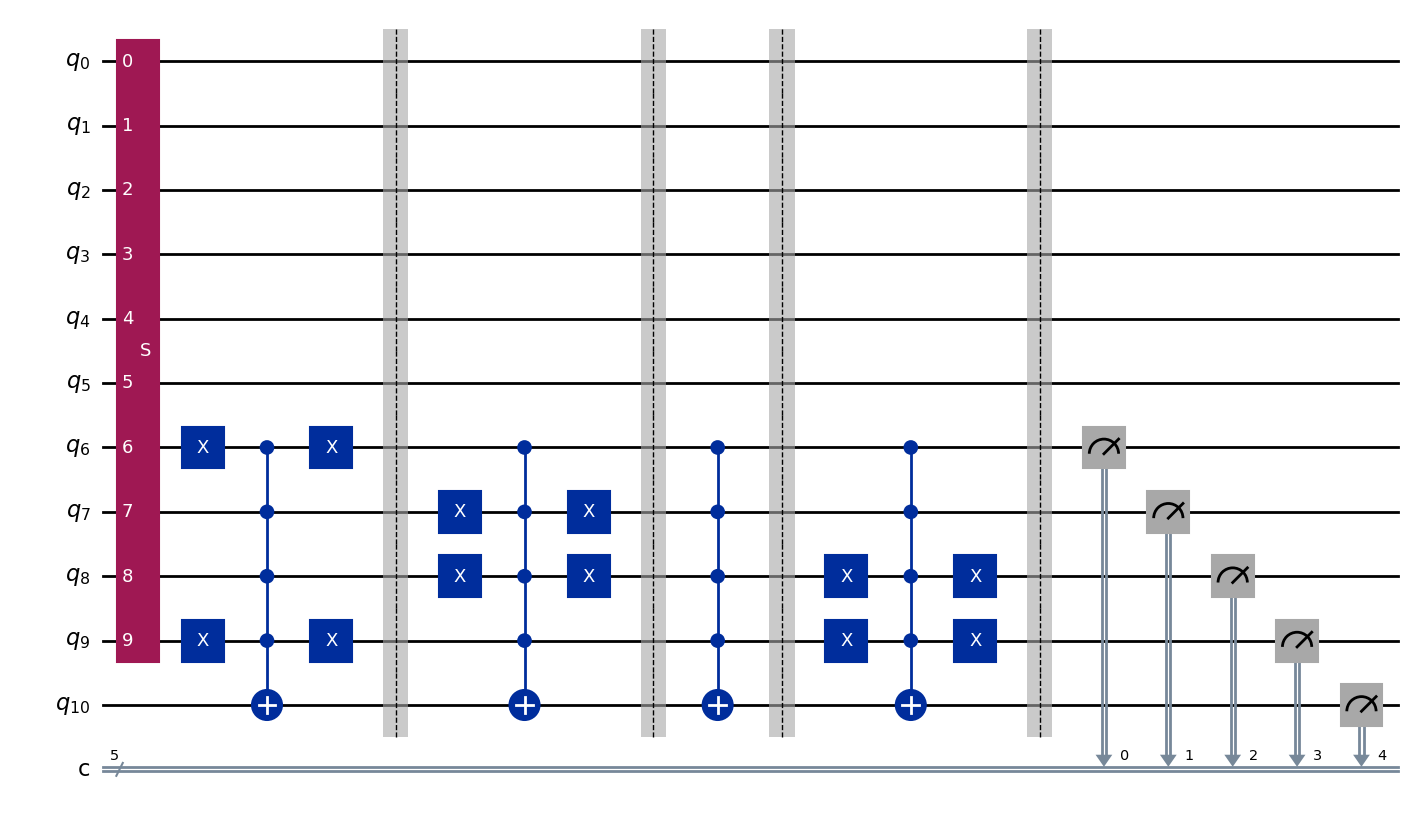

In [4]:
qc = QuantumCircuit(11,5)

qc.append(store(),range(10))

gate = MCXGate(4)
qc.x(6)
qc.x(9)
qc.append(gate, [6,7,8,9,10])
qc.x(6)
qc.x(9)

qc.barrier()
qc.x(7)
qc.x(8)
qc.append(gate, [6,7,8,9,10])
qc.x(7)
qc.x(8)
qc.barrier()


qc.append(gate, [6,7,8,9,10])
qc.barrier()


qc.x(8)
qc.x(9)
qc.append(gate, [6,7,8,9,10])
qc.x(8)
qc.x(9)
qc.barrier()


qc.measure(6,0)
qc.measure(7,1)
qc.measure(8,2)
qc.measure(9,3)
qc.measure(10,4)

qc.draw('mpl', fold=53)


Total count are: {'11111': 2515, '10011': 2522, '10110': 2486, '11001': 2477}


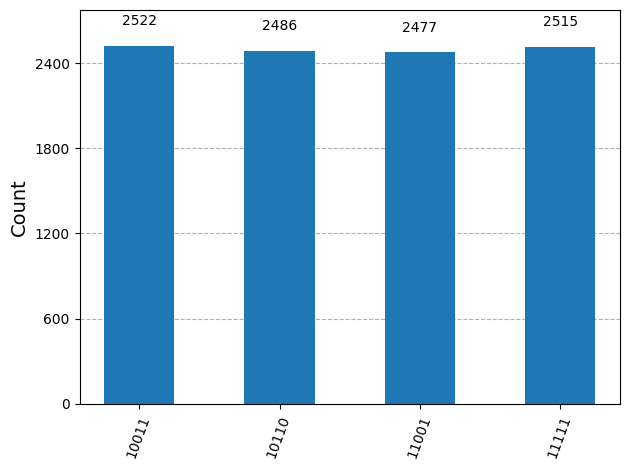

In [5]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose(),shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

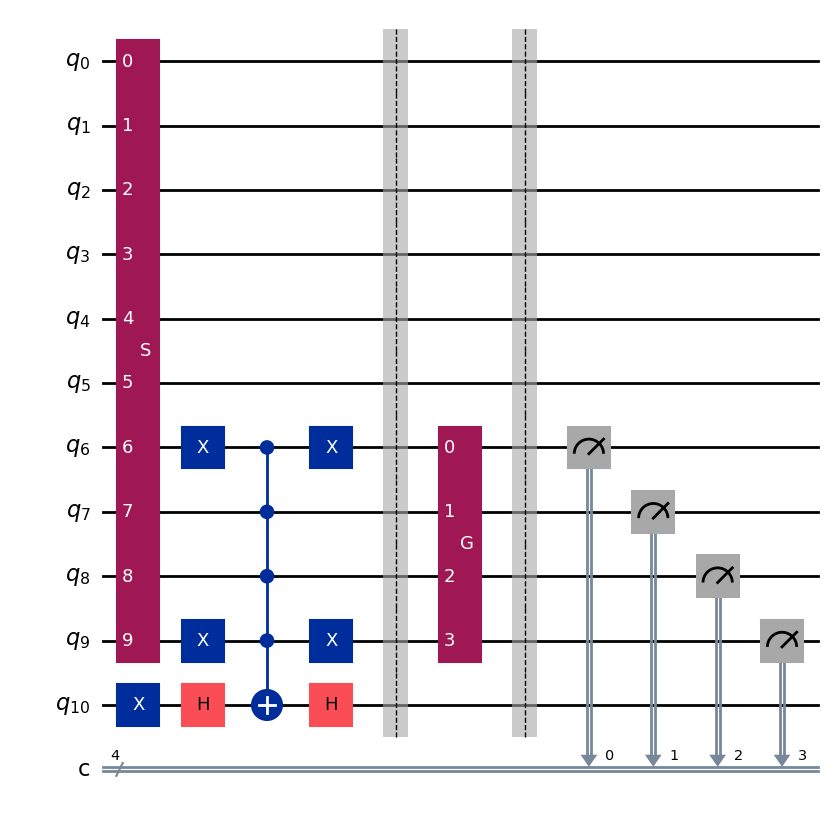

In [6]:
qc = QuantumCircuit(11,4)

qc.append(store(),range(10))

qc.x(10)
qc.h(10)

gate = MCXGate(4)
qc.x(6)
qc.x(9)
qc.append(gate, [6,7,8,9,10])
qc.x(6)
qc.x(9)
qc.h(10)
qc.barrier()

qc.append(grover(),[6,7,8,9])
qc.barrier()


qc.measure(6,0)
qc.measure(7,1)
qc.measure(8,2)
qc.measure(9,3)


qc.draw('mpl', fold=53)


Total count are: {'0000': 160, '1010': 176, '0101': 140, '1011': 152, '1001': 1385, '0010': 166, '1000': 142, '0100': 144, '1100': 152, '1110': 156, '0110': 3944, '0011': 1399, '0001': 129, '0111': 184, '1101': 168, '1111': 1403}


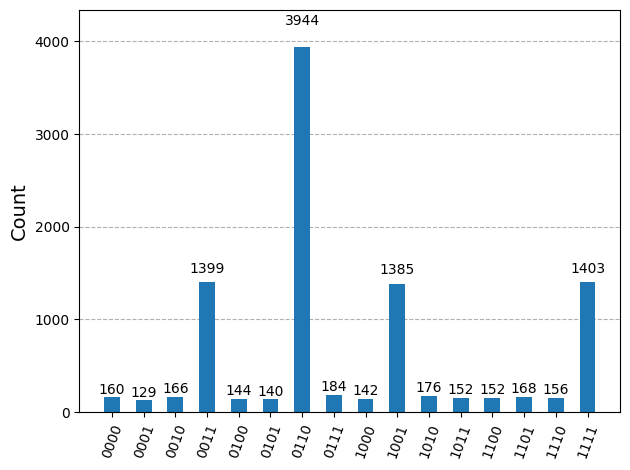

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose(),shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

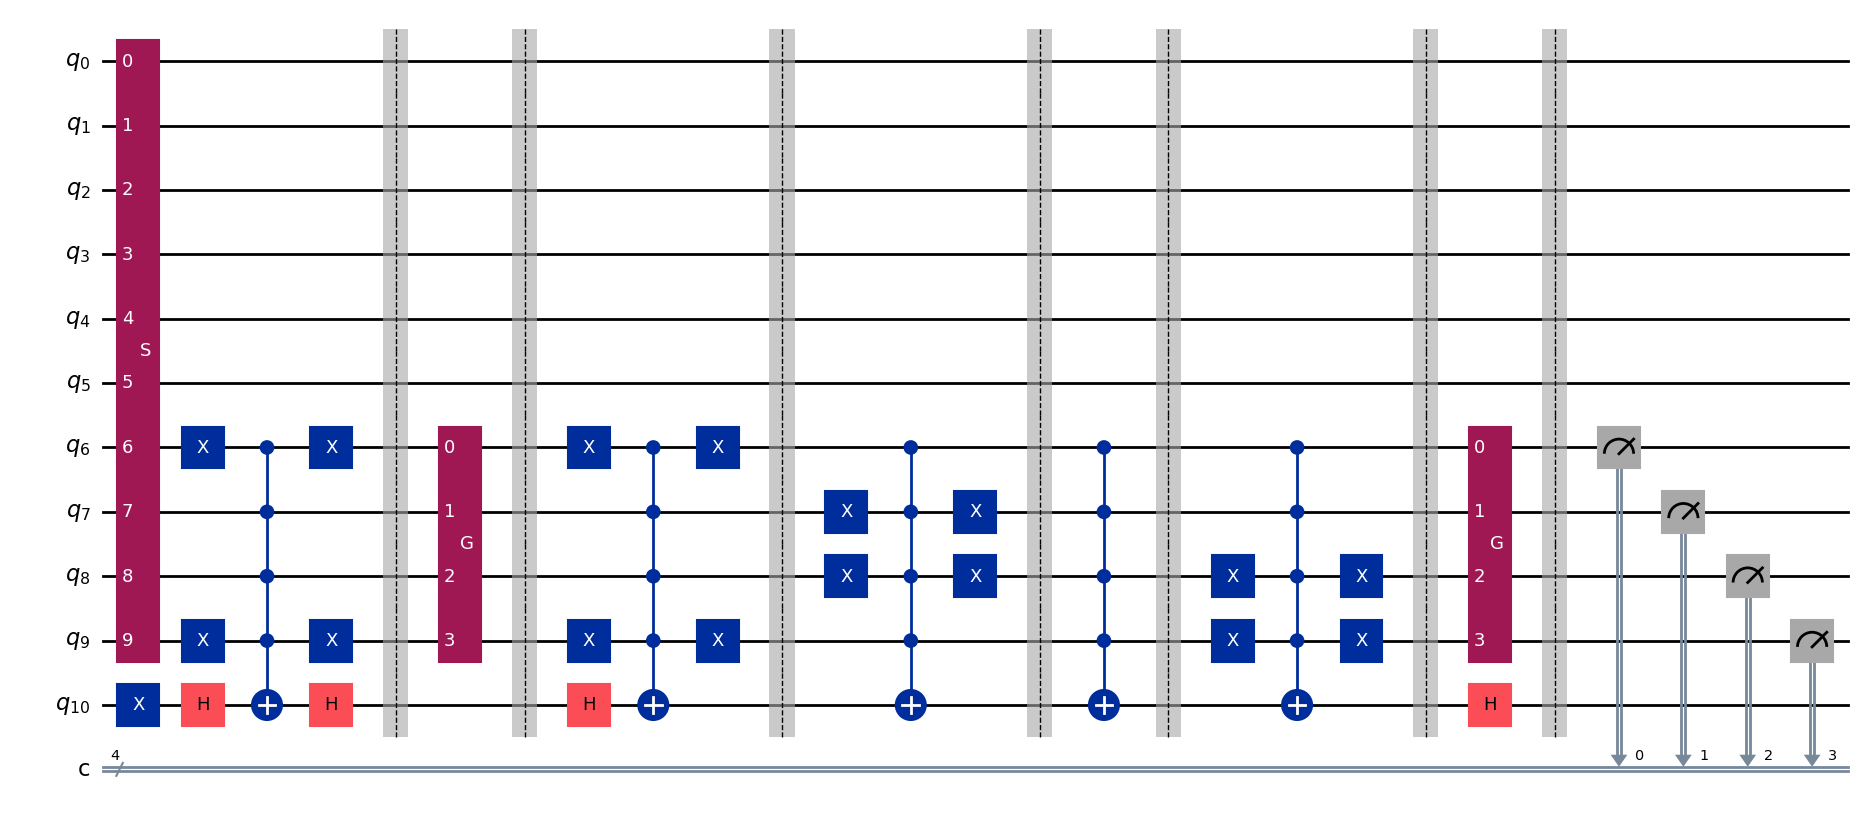

In [8]:
qc = QuantumCircuit(11,4)

qc.append(store(),range(10))

qc.x(10)
qc.h(10)

gate = MCXGate(4)
qc.x(6)
qc.x(9)
qc.append(gate, [6,7,8,9,10])
qc.x(6)
qc.x(9)
qc.h(10)
qc.barrier()

qc.append(grover(),[6,7,8,9])
qc.barrier()
#2th rotation
qc.h(10)
gate = MCXGate(4)
qc.x(6)
qc.x(9)
qc.append(gate, [6,7,8,9,10])
qc.x(6)
qc.x(9)

qc.barrier()
qc.x(7)
qc.x(8)
qc.append(gate, [6,7,8,9,10])
qc.x(7)
qc.x(8)
qc.barrier()


qc.append(gate, [6,7,8,9,10])
qc.barrier()


qc.x(8)
qc.x(9)
qc.append(gate, [6,7,8,9,10])
qc.x(8)
qc.x(9)
qc.barrier()
qc.h(10)

qc.append(grover(),[6,7,8,9])
qc.barrier()

qc.measure(6,0)
qc.measure(7,1)
qc.measure(8,2)
qc.measure(9,3)


qc.draw('mpl', fold=53)


Total count are: {'0111': 149, '0101': 158, '1111': 152, '1101': 151, '1010': 171, '1110': 145, '0100': 168, '1100': 153, '1000': 137, '1011': 168, '1001': 149, '0001': 159, '0011': 117, '0010': 139, '0000': 173, '0110': 7711}


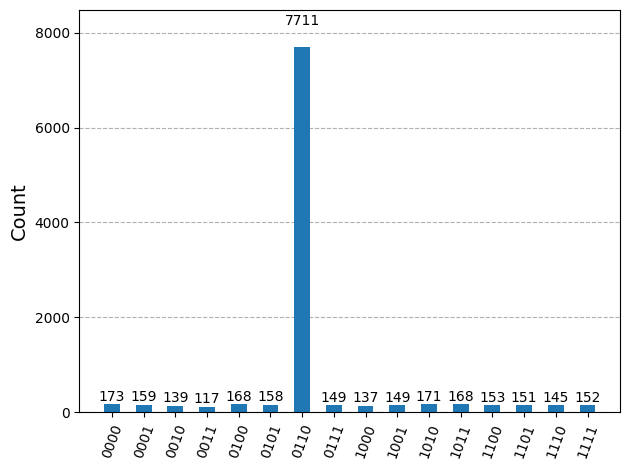

In [9]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose(),shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

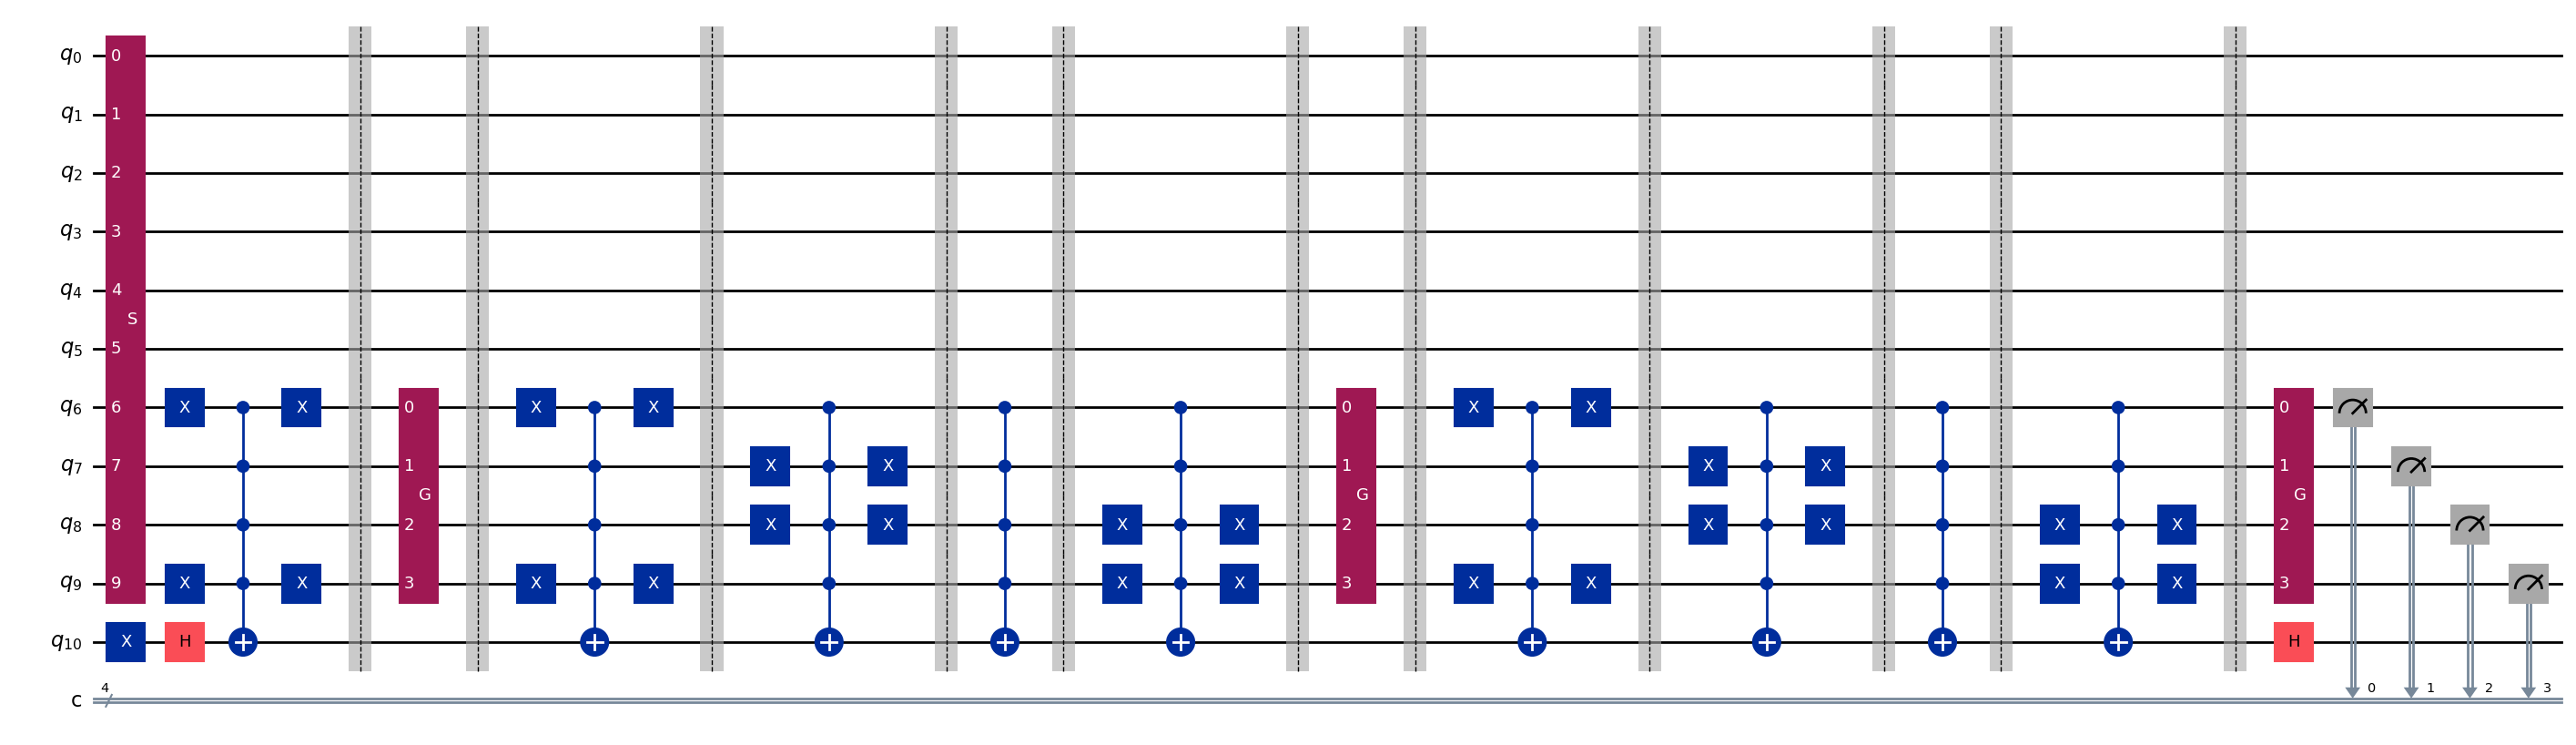

In [10]:
qc = QuantumCircuit(11,4)

qc.append(store(),range(10))

qc.x(10)
qc.h(10)

gate = MCXGate(4)
qc.x(6)
qc.x(9)
qc.append(gate, [6,7,8,9,10])
qc.x(6)
qc.x(9)

qc.barrier()

qc.append(grover(),[6,7,8,9])
qc.barrier()
#2th rotation

gate = MCXGate(4)
qc.x(6)
qc.x(9)
qc.append(gate, [6,7,8,9,10])
qc.x(6)
qc.x(9)

qc.barrier()
qc.x(7)
qc.x(8)
qc.append(gate, [6,7,8,9,10])
qc.x(7)
qc.x(8)
qc.barrier()


qc.append(gate, [6,7,8,9,10])
qc.barrier()


qc.x(8)
qc.x(9)
qc.append(gate, [6,7,8,9,10])
qc.x(8)
qc.x(9)
qc.barrier()


qc.append(grover(),[6,7,8,9])
qc.barrier()
#3th rotation

gate = MCXGate(4)
qc.x(6)
qc.x(9)
qc.append(gate, [6,7,8,9,10])
qc.x(6)
qc.x(9)

qc.barrier()
qc.x(7)
qc.x(8)
qc.append(gate, [6,7,8,9,10])
qc.x(7)
qc.x(8)
qc.barrier()


qc.append(gate, [6,7,8,9,10])
qc.barrier()


qc.x(8)
qc.x(9)
qc.append(gate, [6,7,8,9,10])
qc.x(8)
qc.x(9)
qc.barrier()
qc.h(10)

qc.append(grover(),[6,7,8,9])

qc.measure(6,0)
qc.measure(7,1)
qc.measure(8,2)
qc.measure(9,3)


qc.draw('mpl', fold=53)


Total count are: {'0110': 10000}


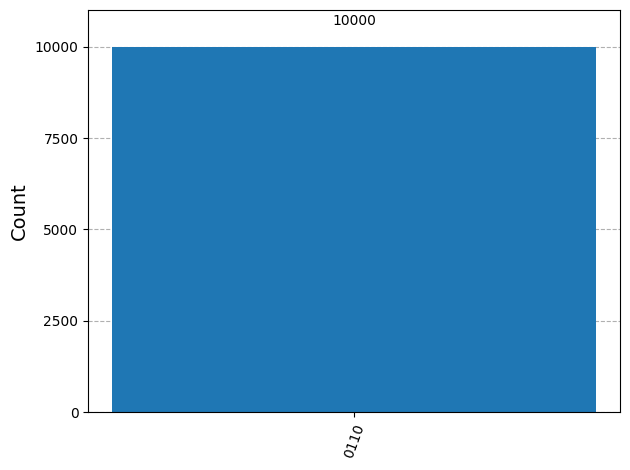

In [11]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose(),shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

In [12]:
qc.decompose().depth()

562